# Visualization with Matplotlib

Let's take an in-depth look at Python's Matplotlib package for visualization. Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish. This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib.

> ✏️ The example is inspired by {cite}`vanderplas_2017`.

We will use some standard shorthands for Matplotlib imports:

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

## Simple Line Plots

For all Matplotlib plots, we start by creating a figure and axes. In their simplest form, a figure and axes can be created as follows:

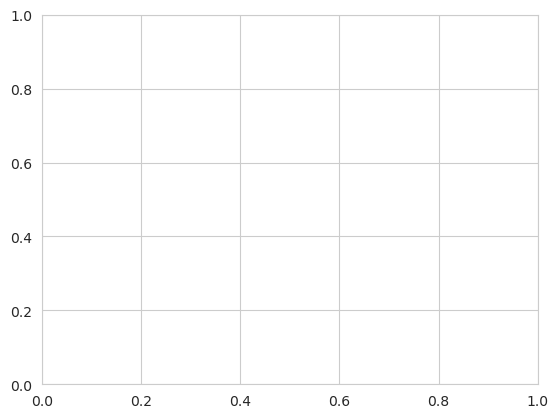

In [2]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the figure (an instance of the class `plt.Figure`) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. The axes (an instance of the class `plt.Axes`) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.

Let's start with a simple sinusoid:

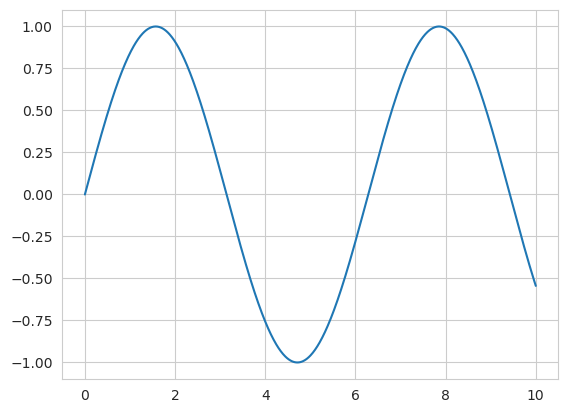

In [3]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

Alternatively, we can use the pylab interface and let the figure and axes be created for us in the background:

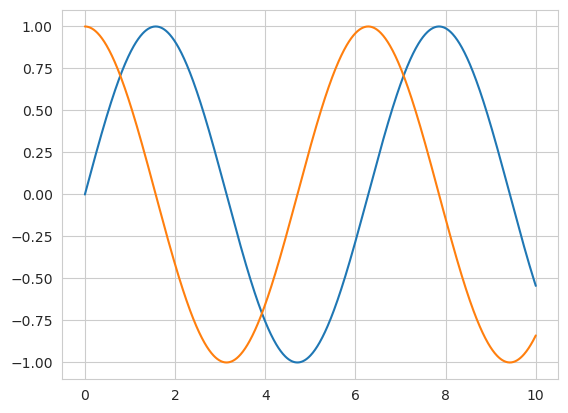

In [4]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

## Adjusting the Plot

### Line Colors and Styles

The first adjustment you might wish to make to a plot is to control the line colors and styles:

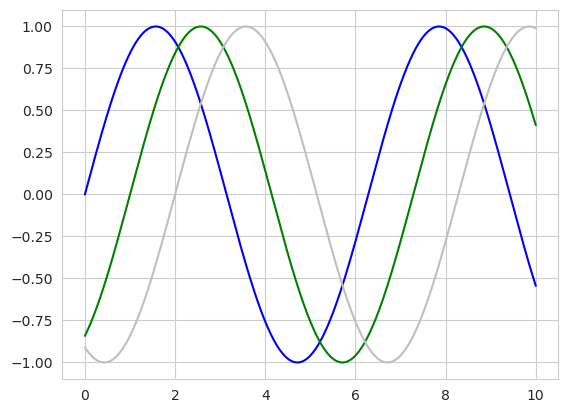

In [5]:
plt.plot(x, np.sin(x - 0), color='blue')
plt.plot(x, np.sin(x - 1), color='g')
plt.plot(x, np.sin(x - 2), color='0.75') ;

Matplotlib will automatically cycle through a set of default colors for multiple lines if no color is specified.

Similarly, the line style can be adjusted using the line style keyword:

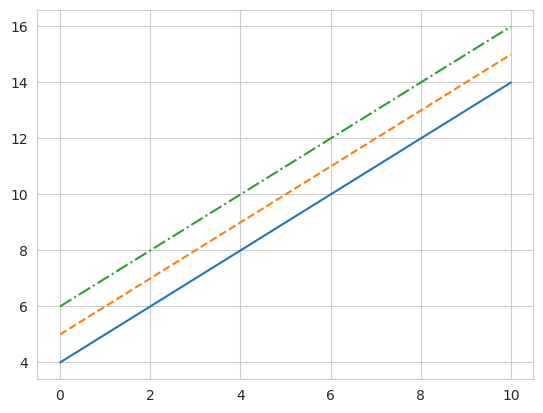

In [6]:
plt.plot(x, x + 4, linestyle='-')
plt.plot(x, x + 5, linestyle='--')
plt.plot(x, x + 6, linestyle='-.');

### Axes Limits

The most basic way to adjust axis limits is to use the `plt.xlim()` and `plt.ylim()` methods:

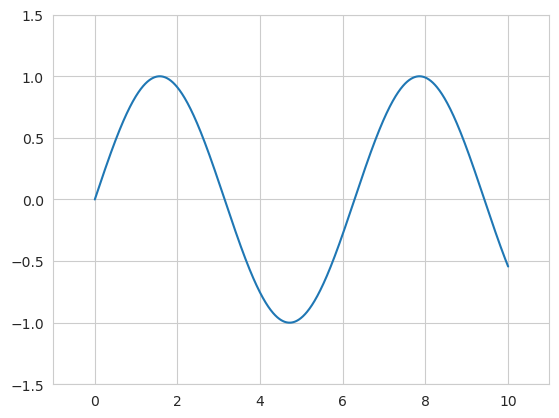

In [7]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

### Labeling Plots

Titles and axis labels are the most straightforward such labels—some methods can be used to set them quickly:

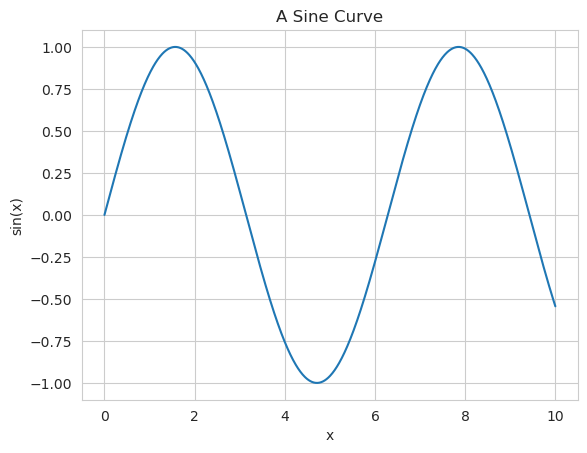

In [8]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

When multiple lines are being shown within a single axes, it can be helpful to create a plot legend that labels each line type:

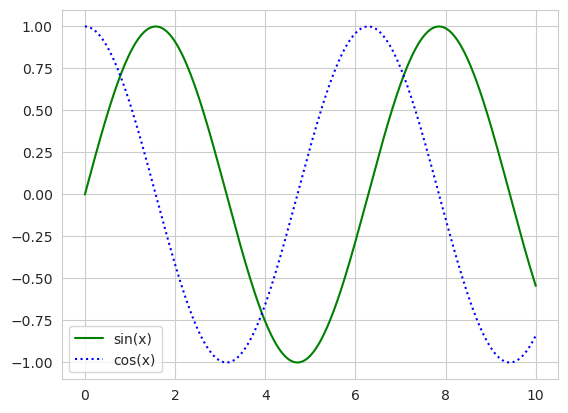

In [9]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')

plt.legend();

## Simple Scatter Plots

Another commonly used plot type is the simple scatter plot. Instead of points being joined by line segments, the points are represented individually with a dot, circle, or another shape.

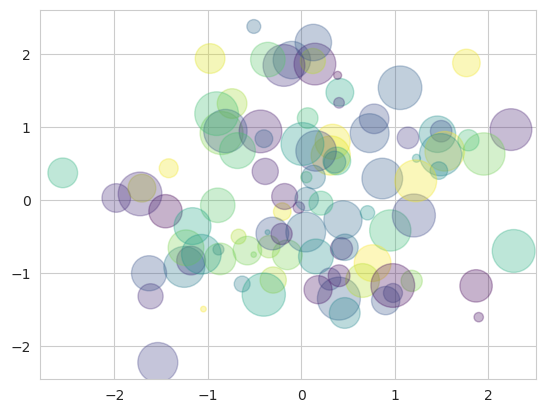

In [10]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis');

## Grids of Subplots

Let's create an entire grid of subplots and return them in a NumPy array:

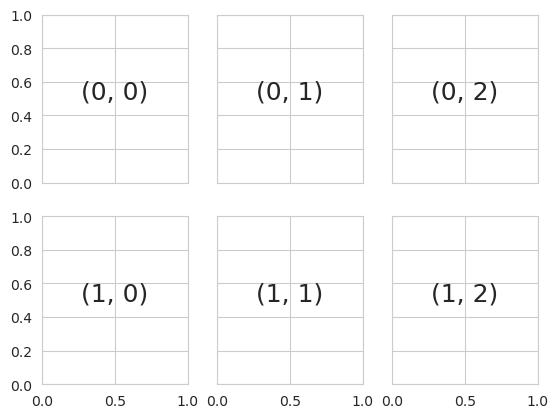

In [11]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')

Note that by specifying sharex and sharey, we've automatically removed inner labels on the grid to make the plot cleaner.

## Histograms, Binnings, and Density

A simple histogram can be a significant first step in understanding a dataset.

Let's generate some data:

In [12]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

And use _hist()_ function and assign several options to tune both the calculation and the display:

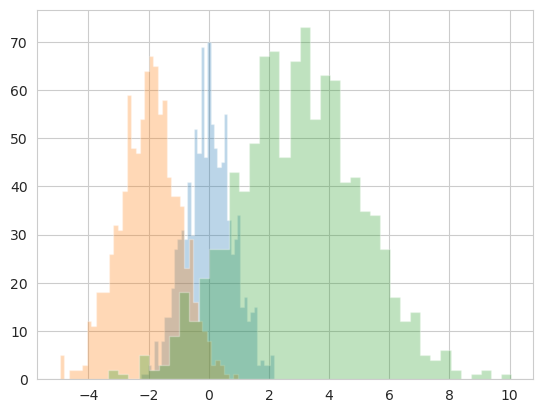

In [13]:
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Let's create histograms in two dimensions by dividing points among two-dimensional bins:

In [14]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

and visualize data as 2D histogram:

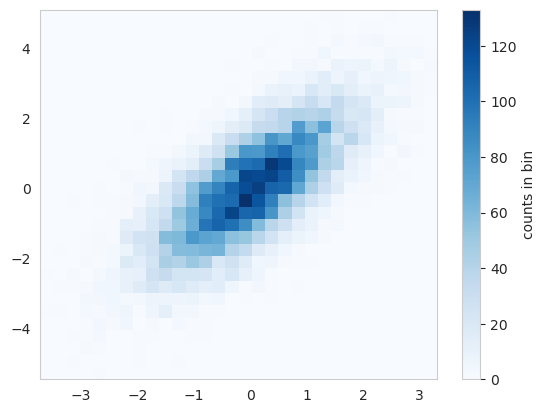

In [15]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin');

## Seaborn

Matplotlib API is relatively low level and is not designed to be used with Pandas. When Matplotlib comes short, Seaborn is for the rescue. Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames.

We will use some standard shorthands for seaborn imports:

In [16]:
import seaborn as sns

# let's surpass some warnings with seaborn (there were some recent changes in the API)
import warnings
warnings.filterwarnings("ignore")

### Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.

Let's generate some data:

In [17]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with `sns.kdeplot`:

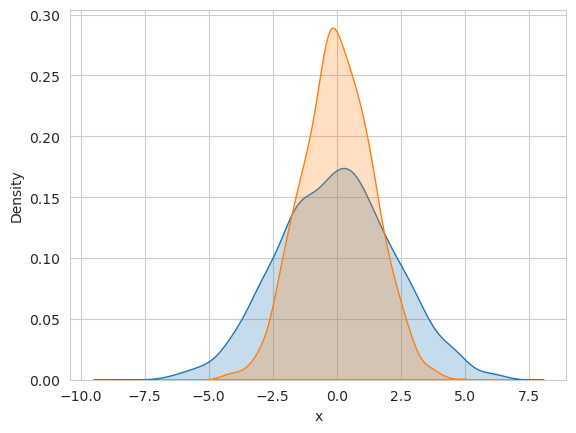

In [18]:
sns.kdeplot(data['x'], fill=True)
sns.kdeplot(data['y'], fill=True);

Histograms and KDE can be combined using distplot:

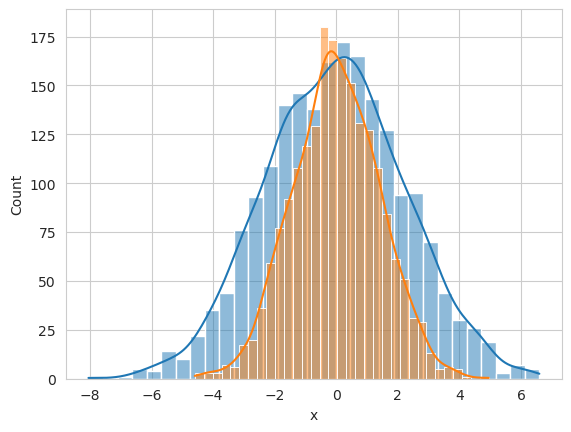

In [19]:
sns.histplot(data['x'], kde=True)
sns.histplot(data['y'], kde=True);

We can see the joint distribution and the marginal distributions together using:

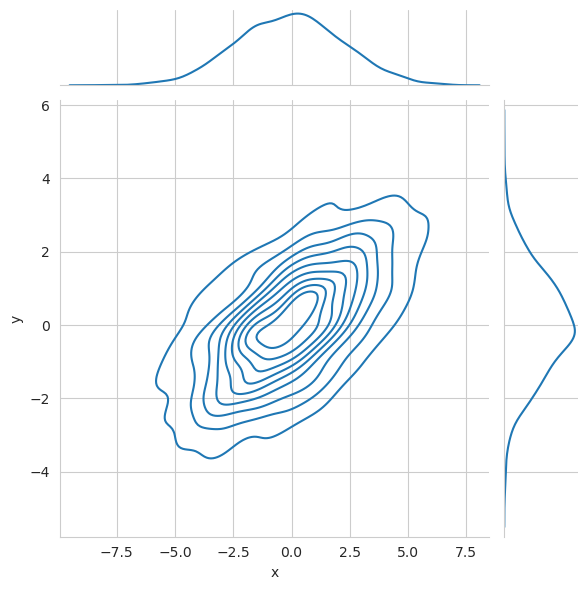

In [20]:
sns.jointplot(x="x", y="y", data=data, kind='kde');

### Pair Plot

When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data when you'd like to plot all pairs of values against each other.

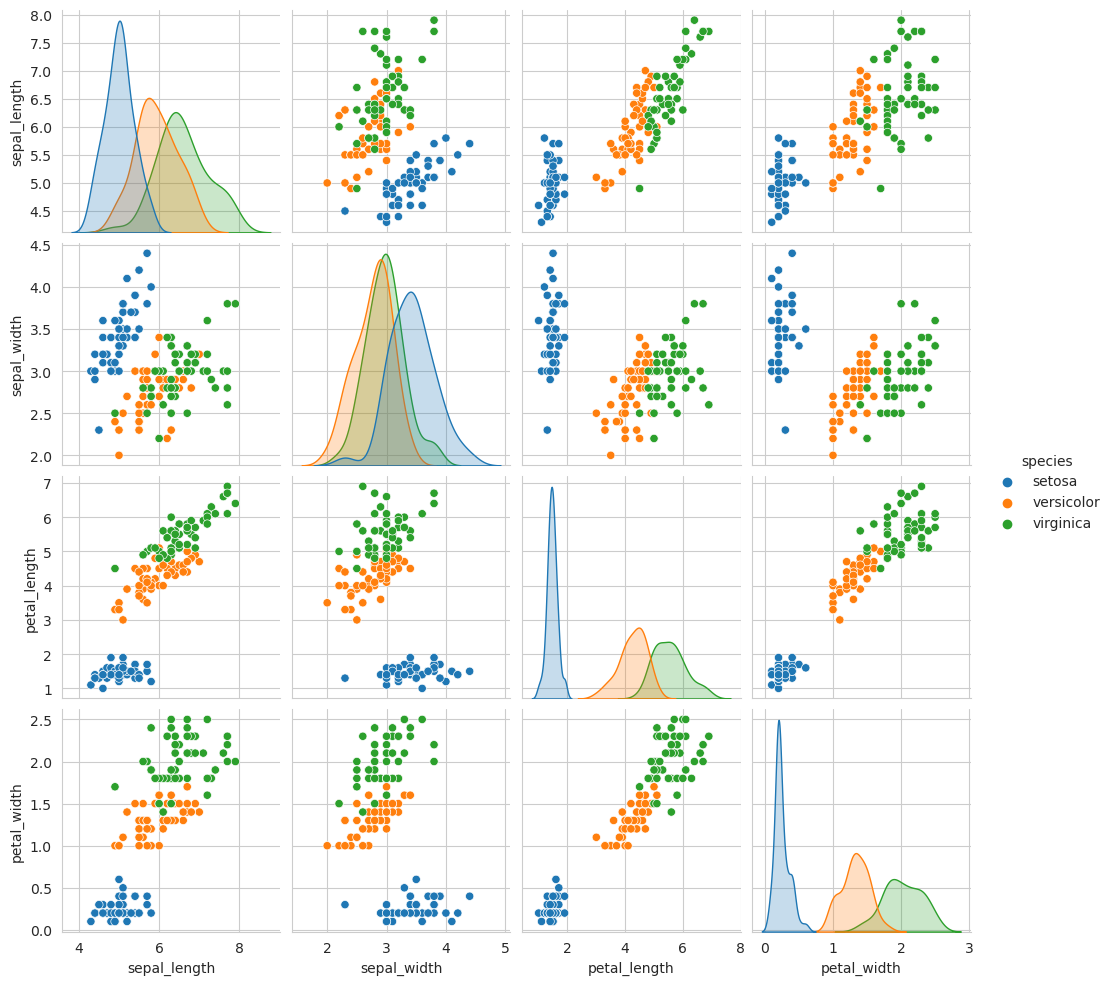

In [21]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species');

Let's revisit some other know visualizations which were shown the last time.

For example, let's check species distribution in the dataset:

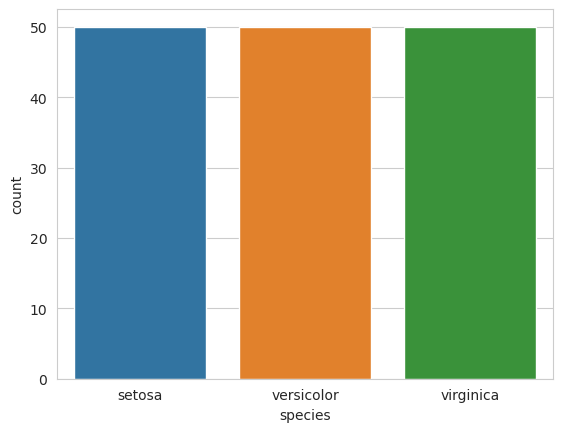

In [22]:
sns.countplot(x="species", data=iris);

Let's measure correlations:

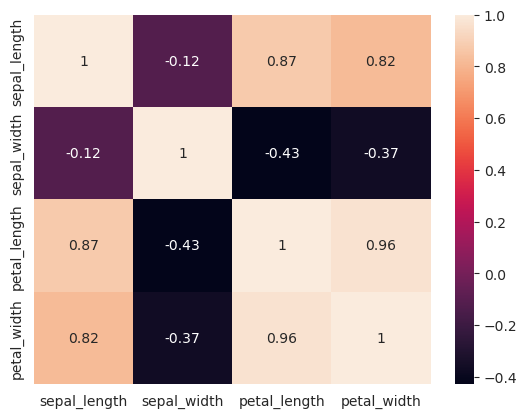

In [23]:
sns.heatmap(iris.corr(method="pearson"), annot=True);

Let's compare the measurement distributions of the classes with box plots:

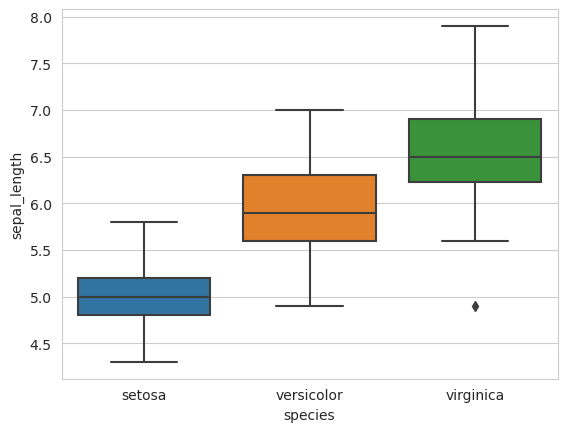

In [24]:
sns.boxplot(data=iris, y="sepal_length", x="species");

We can also use violin plots. Violin plots contain the same information as box plots, but also scale the box according to the density of the data:

<AxesSubplot: xlabel='species', ylabel='sepal_length'>

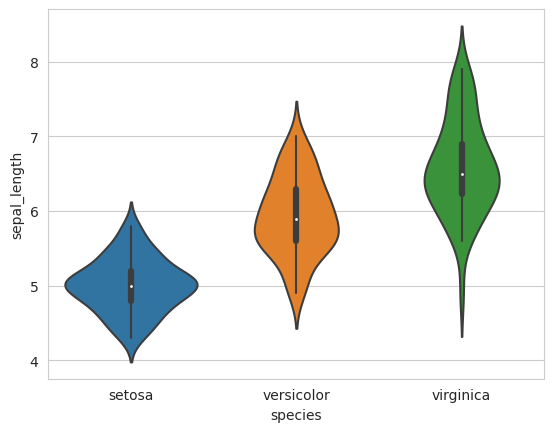

In [25]:
sns.violinplot(data=iris, y="sepal_length", x="species")

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's FacetGrid makes this extremely simple.

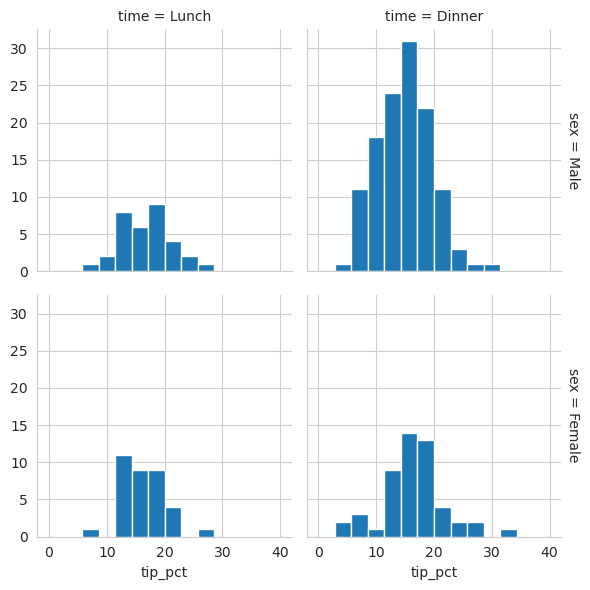

In [26]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

## Exercises

#### Write a Python program to draw a line with suitable label in the x-axis, y-axis and a title

In [27]:
# TODO: your answer here

## Resources

```{bibliography}
:filter: docname in docnames
```